In [13]:
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


cifar_mnist = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()
class_names = ['Airplane', 'Car', 'Birds', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

                                   
#one - hot encoding -> categorical crossentropy
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', input_shape=train_images.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

MODEL_DIR = './model/cifar10/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/cifar10/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=100, batch_size=64, shuffle=True, verbose=1, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(test_images, test_labels)[1]))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,250 (1.08 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2863 - loss: 1.9239
Epoch 1: val_loss improved from inf to 1.43618, saving model to ./model/cifar10/01-1.4362.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.2866 - loss: 1.9233 - val_accuracy: 0.4948 - val_loss: 1.4362
Epoch 2/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4820 - loss: 1.4293
Epoch 2: val_loss improved from 1.43618 to 1.19301, saving model to ./model/cifar10/02-1.1930.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.4820 - loss: 1.4292 - val_accuracy: 0.5836 - val_loss: 1.1930
Epoch 3/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5354 - loss: 1.2855
Epoch 3: val_loss improved from 1.19301 to 1.13754, saving model to ./model/cifar10/03-1.1375.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.5354 - loss: 1.2854 - val_accuracy: 0.5940 - val_loss: 1.1375
Epoch 4/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5688 - loss: 1.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7300 - loss: 0.8072

Loss: 0.8105823993682861, Acc: 0.7300000190734863


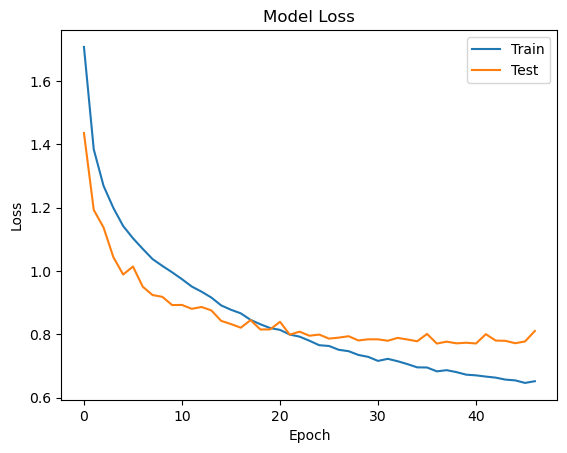

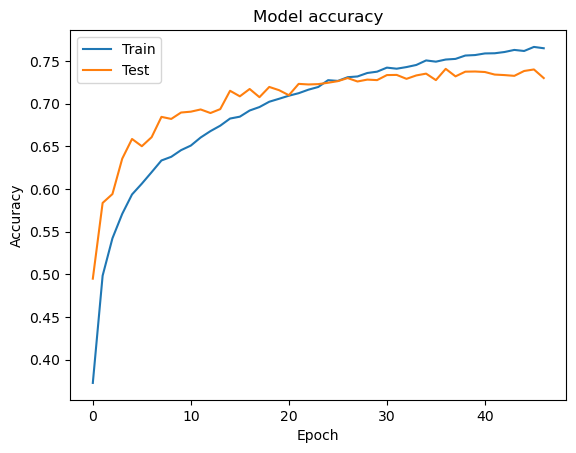

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [14]:
loss, acc= model.evaluate(test_images, test_labels)
print("\nLoss: {}, Acc: {}".format(loss, acc))

def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
plt_show_loss(history)
plt.show()
plt_show_acc(history)
plt.show()

predictions = model.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[np.argmax(true_label)]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x15FAF2270>


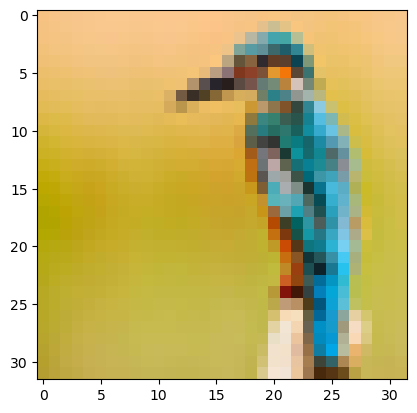

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Birds
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x18AB067B0>


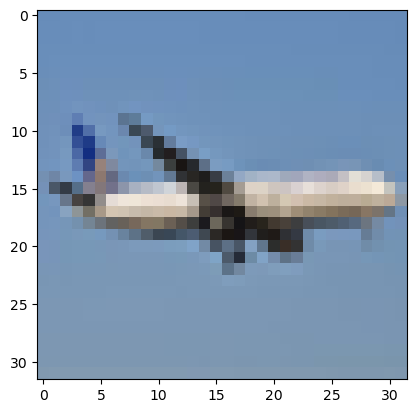

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Airplane
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x224 at 0x18A56E030>


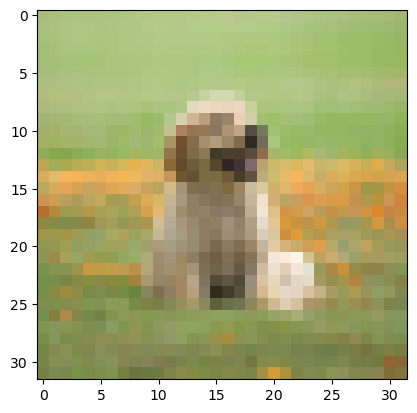

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Deer


In [17]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

model = load_model('./model/cifar10/37-0.7708.keras')
class_names = ['Airplane', 'Car', 'Birds', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

image_path = './datas/cifar10/'
img = []
img_array = []
for i in range(3):
    img.append(Image.open(image_path + '{}.jpeg'.format(i+1)))
    print(img[i])
    img[i] = img[i].resize((32, 32))
    if img[i].mode != 'RGB':
        img[i]=img[i].convert('RGB')
    img_array.append(tf.keras.utils.img_to_array(img[i]))
    img_array[i] = img_array[i].astype('float32')/255
    plt.imshow(img_array[i])
    plt.show()
    img_array[i] = np.expand_dims(img_array[i], 0)
    prediction = model.predict(img_array[i])
    print(class_names[prediction.argmax()])